---
title: "Working with categories"
author: "Damien Martin"
date: "2024-04-30 9:00"
categories: [data-vis, plotnine, snippet, categorical]
image: "image.jpg"
description: "Working with categorical data types in plotnine"
---

# Problem

When creating a categorical datatype, part of the datatype is knowing all the different possibilities of a category. They will show up by default in plotnine, even if those categories don't appear in the data. This can be cumbersome to deal with.

We will give an example using the `mtcars` dataset that shows how this can occur.

# Solution

Using `pd.Series.cat.remove_unused_categories()` is a simple way of solving the problem

# Example 1

## Loading data and showing the problem

Let's start by loading the miles-per-gallon example from plotnine, and converting the manufacturer to a categorical datatype. This might be done to save memory, or may come from some other transformation (e.g. `pd.cut`).

When plotting all categories, there isn't an issue.

In [19]:
import plotnine as p9
import pandas as pd
from plotnine.data import mpg

mpg['manufacturer'] = mpg['manufacturer'].astype('category')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


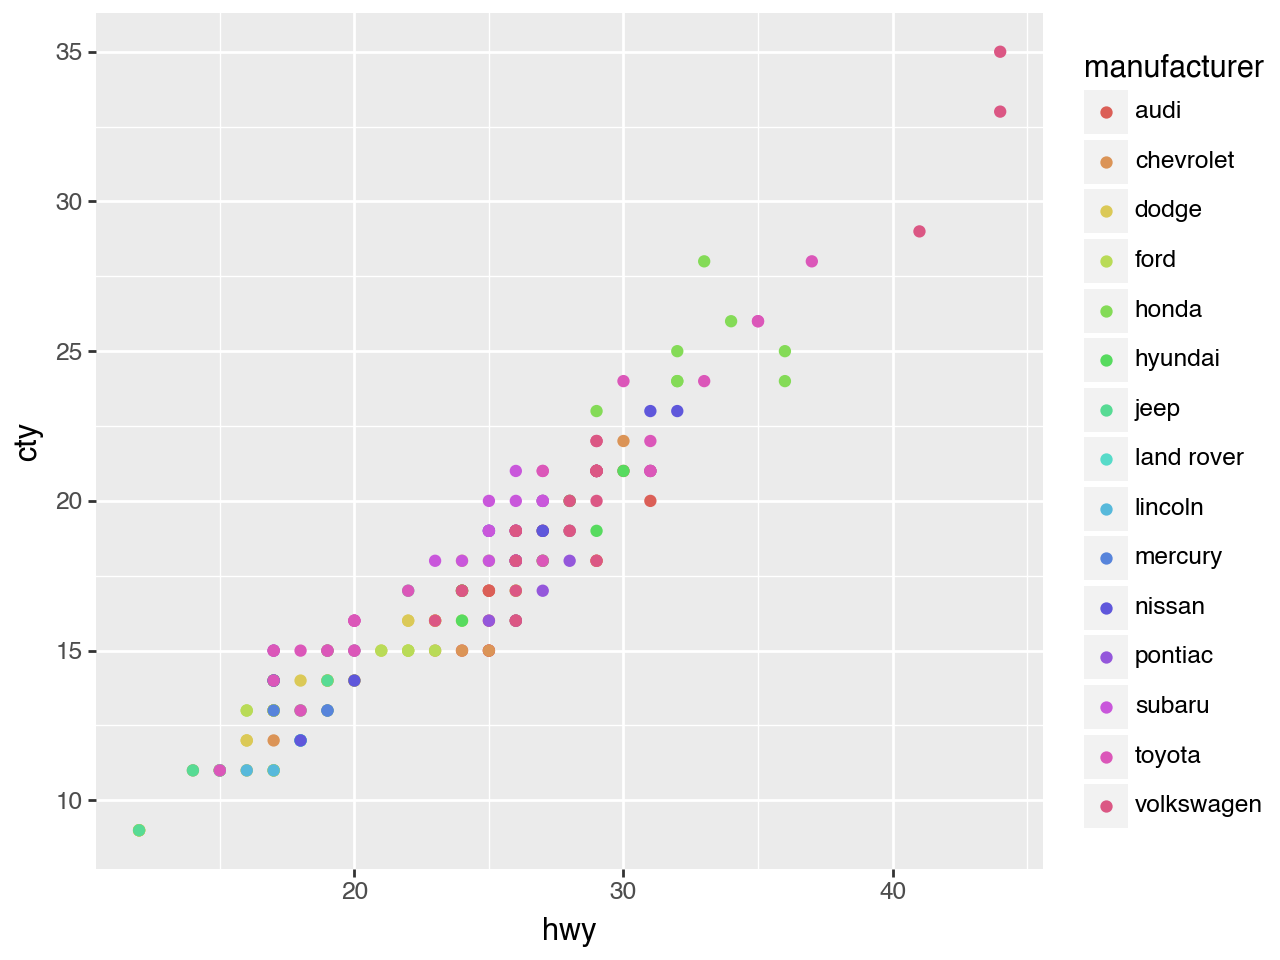

In [20]:
# Plot all categories
(
    p9.ggplot(mpg, mapping=p9.aes(x='hwy', y='cty', color="manufacturer"))
    + p9.geom_point()
)

Let's restrict to some non-US manufacturers:

In [33]:
to_track = [
    'honda',
    'hyundai',
    'nissan',
    'toyota',
    'voltsswagen'
]
subset = mpg[mpg['manufacturer'].cat.as_ordered().isin(to_track)].copy()

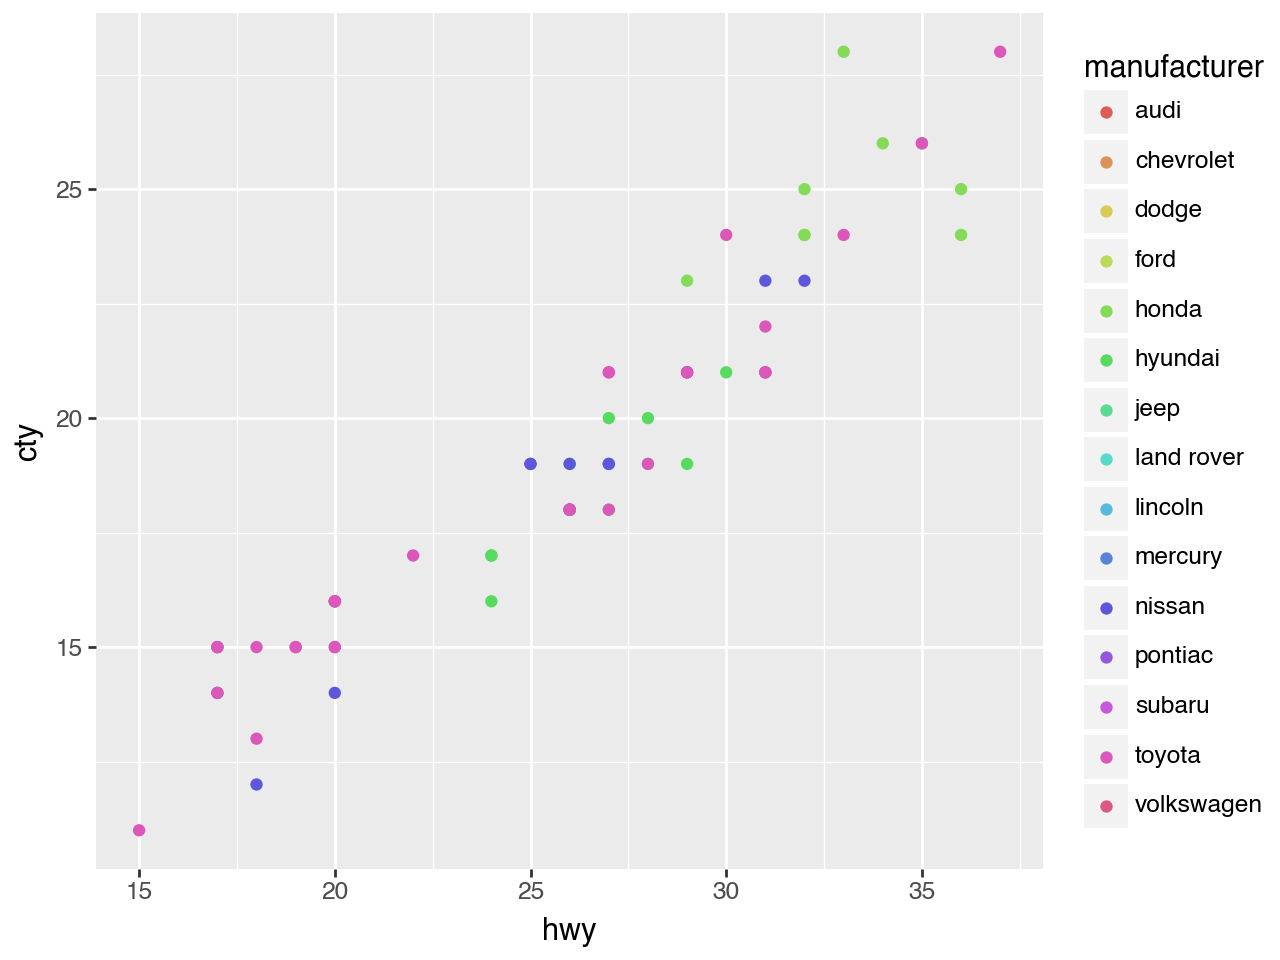

In [34]:
# Plot just these categories
(
    p9.ggplot(subset, mapping=p9.aes(x='hwy', y='cty', color="manufacturer"))
    + p9.geom_point()
)

Note that the legend includes all the unused categories! We would like to eliminate this, especially if it allows more divergent colors.

In [35]:
to_track = [
    'honda',
    'hyundai',
    'nissan',
    'toyota',
    'voltsswagen'
]
subset = mpg[mpg['manufacturer'].cat.as_ordered().isin(to_track)].copy()
# This is the magic line
subset['manufacturer'] = subset['manufacturer'].cat.remove_unused_categories()

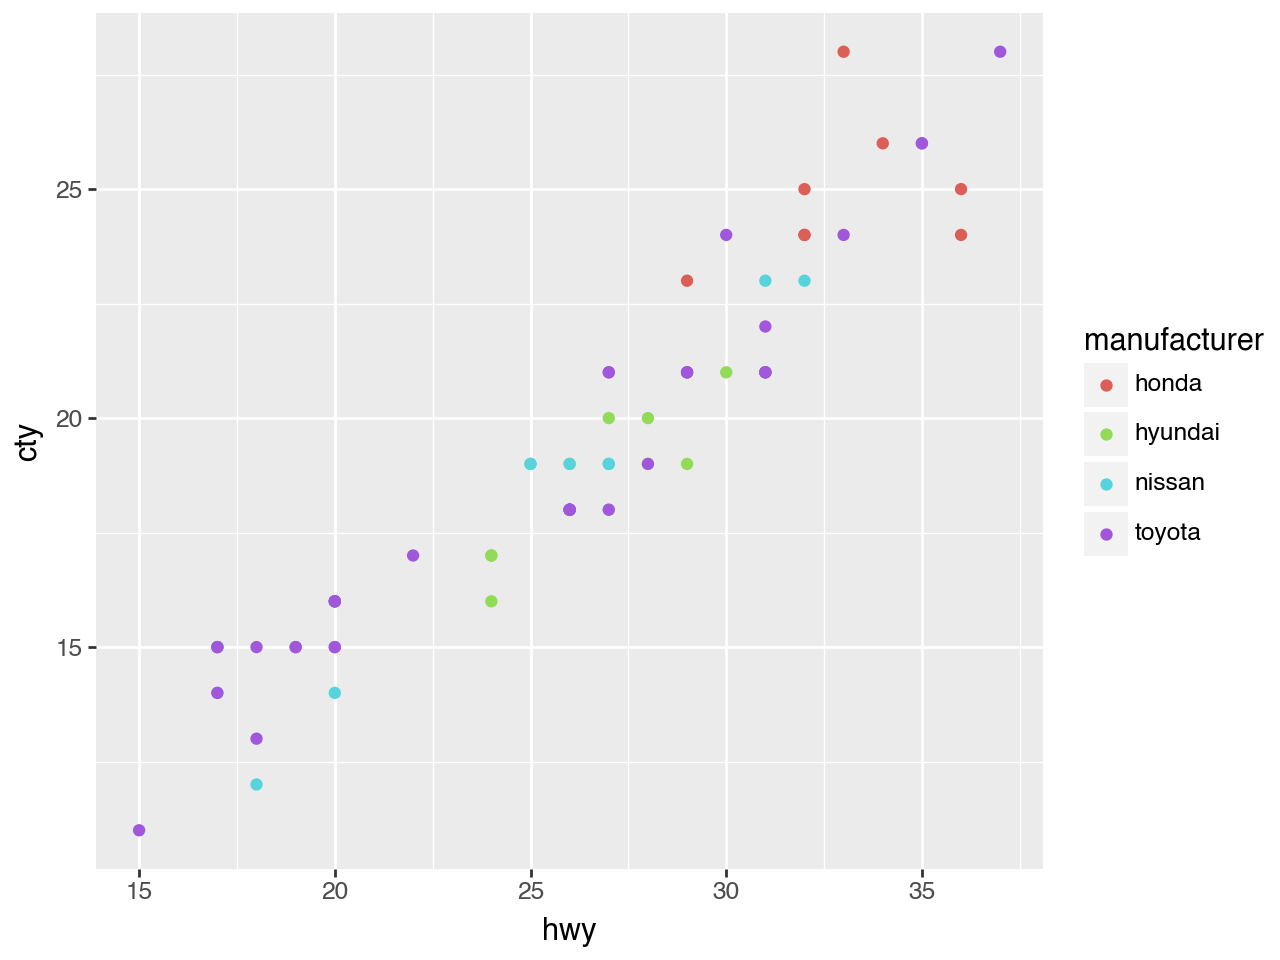

In [36]:
# Plot just these categories
(
    p9.ggplot(subset, mapping=p9.aes(x='hwy', y='cty', color="manufacturer"))
    + p9.geom_point()
)